In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from statannotations.Annotator import Annotator
import scipy.stats as ss
import statsmodels.api as sa
import scikit_posthocs as sp
from statsmodels.formula.api import ols
%matplotlib inline

In [2]:
texture_r1 = pd.read_csv('./Texture_Rep1/211205_exp5.08_image_features_withLaminARatio.csv')

In [4]:
texture_r1

,AngularSecondMoment_DNA,Contrast_DNA,Correlation_DNA,Variance_DNA,InverseDifferenceMoment_DNA,SumAverage_DNA,SumVariance_DNA,SumEntropy_DNA,Entropy_DNA,DifferenceVariance_DNA,...,InfoMeas1_Top2A,InfoMeas2_Top2A,ImagePath_Top2A,Distance_Top2A,InputDir_Top2A,ImageDir_Top2A,Stain_Top2A,ObjectNumber,Metadata_Experiment,Nuc_Cyt_LaminA_Ratio
0,0.000183,209.093134,0.943679,1856.619237,0.091122,255.222117,7217.383814,8.379092,12.704274,0.000143,...,-0.185477,0.956245,210930_CellProfiler_Output/Nuclei_Images_Top2A...,1,210930_CellProfiler_Output,Nuclei_Images_Top2A_slide2_013,Top2A,1,exp508,1.501253
1,0.000131,611.493255,0.835902,1861.638686,0.056601,257.056299,6835.061490,8.345253,13.149154,0.000080,...,-0.153250,0.931889,210930_CellProfiler_Output/Nuclei_Images_Top2A...,2,210930_CellProfiler_Output,Nuclei_Images_Top2A_slide2_013,Top2A,1,exp508,1.501253
2,0.000112,1146.761076,0.695490,1879.739849,0.042169,258.205563,6372.198319,8.297005,13.346332,0.000054,...,-0.134012,0.910975,210930_CellProfiler_Output/Nuclei_Images_Top2A...,3,210930_CellProfiler_Output,Nuclei_Images_Top2A_slide2_013,Top2A,1,exp508,1.501253
3,0.000104,1723.757533,0.547308,1900.126553,0.033632,258.808904,5876.748677,8.240798,13.439304,0.000040,...,-0.121560,0.894034,210930_CellProfiler_Output/Nuclei_Images_Top2A...,4,210930_CellProfiler_Output,Nuclei_Images_Top2A_slide2_013,Top2A,1,exp508,1.501253
4,0.000099,2270.800590,0.408968,1917.696787,0.027183,258.980121,5399.986559,8.184980,13.490990,0.000032,...,-0.114088,0.882007,210930_CellProfiler_Output/Nuclei_Images_Top2A...,5,210930_CellProfiler_Output,Nuclei_Images_Top2A_slide2_013,Top2A,1,exp508,1.501253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5971,0.000276,4127.580776,-0.071547,1933.799160,0.019307,241.459221,3607.615865,7.753633,11.920421,0.000020,...,-0.274127,0.987264,210930_CellProfiler_Output/Nuclei_Images_Top2A...,20,210930_CellProfiler_Output,Nuclei_Images_Top2A_slide3_032,Top2A,1,exp508,0.773656
5972,0.000284,4156.753244,-0.082397,1925.255296,0.019495,241.241345,3544.267941,7.722643,11.873470,0.000021,...,-0.277361,0.987800,210930_CellProfiler_Output/Nuclei_Images_Top2A...,21,210930_CellProfiler_Output,Nuclei_Images_Top2A_slide3_032,Top2A,1,exp508,0.773656
5973,0.000296,4201.119960,-0.091880,1926.572636,0.019769,241.290787,3505.170583,7.703692,11.819472,0.000021,...,-0.281850,0.988390,210930_CellProfiler_Output/Nuclei_Images_Top2A...,22,210930_CellProfiler_Output,Nuclei_Images_Top2A_slide3_032,Top2A,1,exp508,0.773656
5974,0.000309,4259.421354,-0.101727,1935.354346,0.020308,241.680173,3481.996030,7.687896,11.756449,0.000021,...,-0.291041,0.989615,210930_CellProfiler_Output/Nuclei_Images_Top2A...,23,210930_CellProfiler_Output,Nuclei_Images_Top2A_slide3_032,Top2A,1,exp508,0.773656


In [5]:
texture_r2 = pd.read_csv('./Texture_Rep2/211203_image_features_withLaminARatio.csv')

In [6]:
texture_r2['Sample'].unique()

array(['t4 DMSO slide 1', 't8 DMSO', 't4 ICRF-193', 't0 Mitotic', 't2',
       't4 DMSO slide 2', 't8 ICRF-193', 'No Lamin A'], dtype=object)

In [7]:
texture_r1['Replicate'] = 'R1'
texture_r2['Replicate'] = 'R2'

In [8]:
texture_r1['ReplicateNum'] = 1
texture_r2['ReplicateNum'] = 2

In [9]:
texture_r1.loc[texture_r1['Sample'] == 't0 Mitotic','SampleNum'] = 1
texture_r1.loc[texture_r1['Sample'] == 't2','SampleNum'] = 2
texture_r1.loc[texture_r1['Sample'] == 't4 DMSO','SampleNum'] = 3
texture_r1.loc[texture_r1['Sample'] == 't4 ICRF-193','SampleNum'] = 4
texture_r1.loc[texture_r1['Sample'] == 't8 DMSO','SampleNum'] = 5
texture_r1.loc[texture_r1['Sample'] == 't8 ICRF-193','SampleNum'] = 6

In [10]:
texture_r1.loc[:,'SlideNumber'] = 1

In [11]:
texture_r1['Sample'].unique()

array(['t0 Mitotic', 't2', 't8 ICRF-193', 't4 DMSO', 't4 ICRF-193',
       't8 DMSO'], dtype=object)

In [12]:
texture_r2.loc[texture_r2['Sample'] == 't0 Mitotic','SampleNum'] = 1
texture_r2.loc[texture_r2['Sample'] == 't2','SampleNum'] = 2
texture_r2.loc[texture_r2['Sample'] == 't4 DMSO slide 1','SampleNum'] = 3
texture_r2.loc[texture_r2['Sample'] == 't4 DMSO slide 2','SampleNum'] = 3
texture_r2.loc[texture_r2['Sample'] == 't4 ICRF-193','SampleNum'] = 4
texture_r2.loc[texture_r2['Sample'] == 't8 DMSO','SampleNum'] = 5
texture_r2.loc[texture_r2['Sample'] == 't8 ICRF-193','SampleNum'] = 6

In [13]:
texture_r2.loc[:,'SlideNumber'] = 1
texture_r2.loc[texture_r2['Sample'] == 't4 DMSO slide 2','SlideNumber'] = 2

In [14]:
#changing t4 dmso names to all be the same for plotting purposes
texture_r2.loc[texture_r2['Sample'] == 't4 DMSO slide 1','Sample'] = 't4 DMSO'
texture_r2.loc[texture_r2['Sample'] == 't4 DMSO slide 2','Sample'] = 't4 DMSO'

In [15]:
texture_r1.columns

Index(['AngularSecondMoment_DNA', 'Contrast_DNA', 'Correlation_DNA',
       'Variance_DNA', 'InverseDifferenceMoment_DNA', 'SumAverage_DNA',
       'SumVariance_DNA', 'SumEntropy_DNA', 'Entropy_DNA',
       'DifferenceVariance_DNA', 'DifferenceEntropy_DNA', 'InfoMeas1_DNA',
       'InfoMeas2_DNA', 'ImagePath_DNA', 'Distance_DNA', 'InputDir_DNA',
       'ImageDir_DNA', 'FileName', 'Stain_DNA', 'SlideNum', 'ImageNum',
       'Sample', 'AngularSecondMoment_Top2A', 'Contrast_Top2A',
       'Correlation_Top2A', 'Variance_Top2A', 'InverseDifferenceMoment_Top2A',
       'SumAverage_Top2A', 'SumVariance_Top2A', 'SumEntropy_Top2A',
       'Entropy_Top2A', 'DifferenceVariance_Top2A', 'DifferenceEntropy_Top2A',
       'InfoMeas1_Top2A', 'InfoMeas2_Top2A', 'ImagePath_Top2A',
       'Distance_Top2A', 'InputDir_Top2A', 'ImageDir_Top2A', 'Stain_Top2A',
       'ObjectNumber', 'Metadata_Experiment', 'Nuc_Cyt_LaminA_Ratio',
       'Replicate', 'ReplicateNum', 'SampleNum', 'SlideNumber'],
      dtype='ob

In [16]:
texture_r1

,AngularSecondMoment_DNA,Contrast_DNA,Correlation_DNA,Variance_DNA,InverseDifferenceMoment_DNA,SumAverage_DNA,SumVariance_DNA,SumEntropy_DNA,Entropy_DNA,DifferenceVariance_DNA,...,InputDir_Top2A,ImageDir_Top2A,Stain_Top2A,ObjectNumber,Metadata_Experiment,Nuc_Cyt_LaminA_Ratio,Replicate,ReplicateNum,SampleNum,SlideNumber
0,0.000183,209.093134,0.943679,1856.619237,0.091122,255.222117,7217.383814,8.379092,12.704274,0.000143,...,210930_CellProfiler_Output,Nuclei_Images_Top2A_slide2_013,Top2A,1,exp508,1.501253,R1,1,1.0,1
1,0.000131,611.493255,0.835902,1861.638686,0.056601,257.056299,6835.061490,8.345253,13.149154,0.000080,...,210930_CellProfiler_Output,Nuclei_Images_Top2A_slide2_013,Top2A,1,exp508,1.501253,R1,1,1.0,1
2,0.000112,1146.761076,0.695490,1879.739849,0.042169,258.205563,6372.198319,8.297005,13.346332,0.000054,...,210930_CellProfiler_Output,Nuclei_Images_Top2A_slide2_013,Top2A,1,exp508,1.501253,R1,1,1.0,1
3,0.000104,1723.757533,0.547308,1900.126553,0.033632,258.808904,5876.748677,8.240798,13.439304,0.000040,...,210930_CellProfiler_Output,Nuclei_Images_Top2A_slide2_013,Top2A,1,exp508,1.501253,R1,1,1.0,1
4,0.000099,2270.800590,0.408968,1917.696787,0.027183,258.980121,5399.986559,8.184980,13.490990,0.000032,...,210930_CellProfiler_Output,Nuclei_Images_Top2A_slide2_013,Top2A,1,exp508,1.501253,R1,1,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5971,0.000276,4127.580776,-0.071547,1933.799160,0.019307,241.459221,3607.615865,7.753633,11.920421,0.000020,...,210930_CellProfiler_Output,Nuclei_Images_Top2A_slide3_032,Top2A,1,exp508,0.773656,R1,1,2.0,1
5972,0.000284,4156.753244,-0.082397,1925.255296,0.019495,241.241345,3544.267941,7.722643,11.873470,0.000021,...,210930_CellProfiler_Output,Nuclei_Images_Top2A_slide3_032,Top2A,1,exp508,0.773656,R1,1,2.0,1
5973,0.000296,4201.119960,-0.091880,1926.572636,0.019769,241.290787,3505.170583,7.703692,11.819472,0.000021,...,210930_CellProfiler_Output,Nuclei_Images_Top2A_slide3_032,Top2A,1,exp508,0.773656,R1,1,2.0,1
5974,0.000309,4259.421354,-0.101727,1935.354346,0.020308,241.680173,3481.996030,7.687896,11.756449,0.000021,...,210930_CellProfiler_Output,Nuclei_Images_Top2A_slide3_032,Top2A,1,exp508,0.773656,R1,1,2.0,1


In [17]:
texture_r2

,AngularSecondMoment_DNA,Contrast_DNA,Correlation_DNA,Variance_DNA,InverseDifferenceMoment_DNA,SumAverage_DNA,SumVariance_DNA,SumEntropy_DNA,Entropy_DNA,DifferenceVariance_DNA,...,InputDir_Top2A,ImageDir_Top2A,Stain_Top2A,ObjectNumber,Metadata_Experiment,Nuc_Cyt_LaminA_Ratio,Replicate,ReplicateNum,SampleNum,SlideNumber
0,0.000224,159.723227,0.948579,1553.850405,0.098600,225.804304,6055.678393,8.239914,12.441834,0.000160,...,211008_CellProfilerOutput,Nuclei_Images_Top2A_Slide2_022,Top2A,2,exp512,5.135985,R2,2,3.0,1
1,0.000179,302.822432,0.900380,1521.665485,0.072592,227.523768,5783.839508,8.212350,12.753807,0.000113,...,211008_CellProfilerOutput,Nuclei_Images_Top2A_Slide2_022,Top2A,2,exp512,5.135985,R2,2,3.0,1
2,0.000154,483.353943,0.838396,1497.583458,0.056974,229.071290,5506.979887,8.181884,12.952176,0.000087,...,211008_CellProfilerOutput,Nuclei_Images_Top2A_Slide2_022,Top2A,2,exp512,5.135985,R2,2,3.0,1
3,0.000140,676.616681,0.771071,1479.935183,0.048627,230.474951,5243.124051,8.156465,13.078494,0.000071,...,211008_CellProfilerOutput,Nuclei_Images_Top2A_Slide2_022,Top2A,2,exp512,5.135985,R2,2,3.0,1
4,0.000130,869.876064,0.703289,1467.577604,0.042820,231.736331,5000.434353,8.127427,13.168946,0.000060,...,211008_CellProfilerOutput,Nuclei_Images_Top2A_Slide2_022,Top2A,2,exp512,5.135985,R2,2,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12283,0.000123,2099.640014,0.218152,1340.422250,0.023731,243.633181,3262.048985,7.827100,13.193456,0.000033,...,211008_CellProfilerOutput,Nuclei_Images_Top2A_Slide2_004,Top2A,1,exp512,6.129734,R2,2,3.0,1
12284,0.000124,2165.162597,0.197933,1347.050273,0.023222,243.914381,3223.038493,7.819034,13.183686,0.000032,...,211008_CellProfilerOutput,Nuclei_Images_Top2A_Slide2_004,Top2A,1,exp512,6.129734,R2,2,3.0,1
12285,0.000124,2234.657149,0.177599,1355.447328,0.023201,244.175980,3187.132163,7.811080,13.179373,0.000031,...,211008_CellProfilerOutput,Nuclei_Images_Top2A_Slide2_004,Top2A,1,exp512,6.129734,R2,2,3.0,1
12286,0.000125,2316.952672,0.153851,1365.239646,0.024275,244.443076,3144.005913,7.800134,13.164563,0.000030,...,211008_CellProfilerOutput,Nuclei_Images_Top2A_Slide2_004,Top2A,1,exp512,6.129734,R2,2,3.0,1


In [91]:
#Filter t4 and t8 nuclei based on lamin A ratio

(array([144., 120.,  72.,  96.,  48.,   0.,  24.,  24.,  24.,  48.]),
 array([0.32231562, 0.48956914, 0.65682267, 0.82407619, 0.99132972,
        1.15858324, 1.32583677, 1.49309029, 1.66034382, 1.82759734,
        1.99485087]),
 <BarContainer object of 10 artists>)

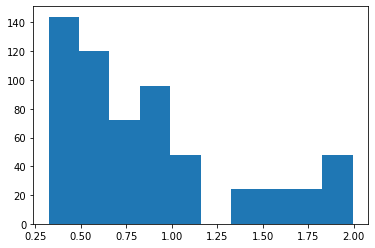

In [92]:
plt.hist(texture_r1.loc[texture_r1['Sample'] == 't0 Mitotic', 'Nuc_Cyt_LaminA_Ratio'])

(array([528., 120., 120., 168., 144., 192., 144., 144.,   0.,  24.]),
 array([0.48602794, 1.26463631, 2.04324467, 2.82185304, 3.6004614 ,
        4.37906977, 5.15767813, 5.93628649, 6.71489486, 7.49350322,
        8.27211159]),
 <BarContainer object of 10 artists>)

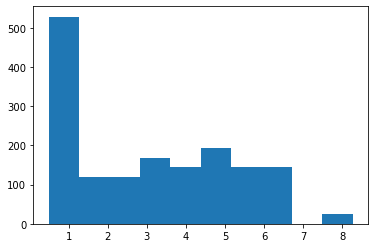

In [93]:
plt.hist(texture_r1.loc[texture_r1['Sample'] == 't2', 'Nuc_Cyt_LaminA_Ratio'])

(array([144.,  24.,  72., 120., 264., 168.,  96.,  72.,  24.,  24.]),
 array([0.84029037, 1.72692515, 2.61355993, 3.50019471, 4.38682949,
        5.27346427, 6.16009904, 7.04673382, 7.9333686 , 8.82000338,
        9.70663816]),
 <BarContainer object of 10 artists>)

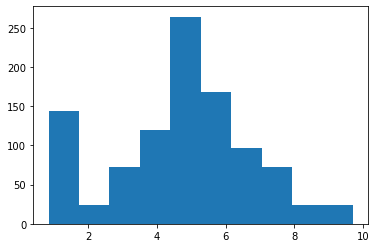

In [94]:
plt.hist(texture_r1.loc[texture_r1['Sample'] == 't4 DMSO', 'Nuc_Cyt_LaminA_Ratio'])

(array([ 96.,  48.,  24., 264., 264., 120.,  48.,   0.,   0.,  24.]),
 array([ 0.61779641,  1.62716077,  2.63652513,  3.64588949,  4.65525385,
         5.66461822,  6.67398258,  7.68334694,  8.6927113 ,  9.70207566,
        10.71144002]),
 <BarContainer object of 10 artists>)

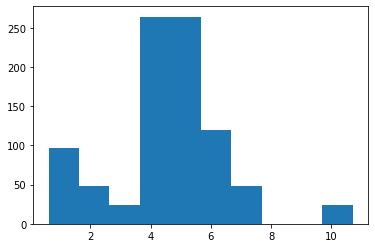

In [95]:
plt.hist(texture_r1.loc[texture_r1['Sample'] == 't4 ICRF-193', 'Nuc_Cyt_LaminA_Ratio'])

In [96]:
#1 seems like a good cutoff

In [97]:
texture_combined = texture_r1.append(texture_r2, ignore_index = True)

In [98]:
texture_combined

,AngularSecondMoment_DNA,Contrast_DNA,Correlation_DNA,Variance_DNA,InverseDifferenceMoment_DNA,SumAverage_DNA,SumVariance_DNA,SumEntropy_DNA,Entropy_DNA,DifferenceVariance_DNA,...,InputDir_Top2A,ImageDir_Top2A,Stain_Top2A,ObjectNumber,Metadata_Experiment,Nuc_Cyt_LaminA_Ratio,Replicate,ReplicateNum,SampleNum,SlideNumber
0,0.000183,209.093134,0.943679,1856.619237,0.091122,255.222117,7217.383814,8.379092,12.704274,0.000143,...,210930_CellProfiler_Output,Nuclei_Images_Top2A_slide2_013,Top2A,1,exp508,1.501253,R1,1,1.0,1
1,0.000131,611.493255,0.835902,1861.638686,0.056601,257.056299,6835.061490,8.345253,13.149154,0.000080,...,210930_CellProfiler_Output,Nuclei_Images_Top2A_slide2_013,Top2A,1,exp508,1.501253,R1,1,1.0,1
2,0.000112,1146.761076,0.695490,1879.739849,0.042169,258.205563,6372.198319,8.297005,13.346332,0.000054,...,210930_CellProfiler_Output,Nuclei_Images_Top2A_slide2_013,Top2A,1,exp508,1.501253,R1,1,1.0,1
3,0.000104,1723.757533,0.547308,1900.126553,0.033632,258.808904,5876.748677,8.240798,13.439304,0.000040,...,210930_CellProfiler_Output,Nuclei_Images_Top2A_slide2_013,Top2A,1,exp508,1.501253,R1,1,1.0,1
4,0.000099,2270.800590,0.408968,1917.696787,0.027183,258.980121,5399.986559,8.184980,13.490990,0.000032,...,210930_CellProfiler_Output,Nuclei_Images_Top2A_slide2_013,Top2A,1,exp508,1.501253,R1,1,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18259,0.000123,2099.640014,0.218152,1340.422250,0.023731,243.633181,3262.048985,7.827100,13.193456,0.000033,...,211008_CellProfilerOutput,Nuclei_Images_Top2A_Slide2_004,Top2A,1,exp512,6.129734,R2,2,3.0,1
18260,0.000124,2165.162597,0.197933,1347.050273,0.023222,243.914381,3223.038493,7.819034,13.183686,0.000032,...,211008_CellProfilerOutput,Nuclei_Images_Top2A_Slide2_004,Top2A,1,exp512,6.129734,R2,2,3.0,1
18261,0.000124,2234.657149,0.177599,1355.447328,0.023201,244.175980,3187.132163,7.811080,13.179373,0.000031,...,211008_CellProfilerOutput,Nuclei_Images_Top2A_Slide2_004,Top2A,1,exp512,6.129734,R2,2,3.0,1
18262,0.000125,2316.952672,0.153851,1365.239646,0.024275,244.443076,3144.005913,7.800134,13.164563,0.000030,...,211008_CellProfilerOutput,Nuclei_Images_Top2A_Slide2_004,Top2A,1,exp512,6.129734,R2,2,3.0,1


In [99]:
texture_combined_filtered = texture_combined.loc[
    (texture_combined['SampleNum'].isin([1, 2])) |
    ((texture_combined['SampleNum'].isin([3, 4, 5, 6])) & 
    (texture_combined['Nuc_Cyt_LaminA_Ratio'] > 1))
].reset_index(drop = True)

In [100]:
texture_combined_filtered

,AngularSecondMoment_DNA,Contrast_DNA,Correlation_DNA,Variance_DNA,InverseDifferenceMoment_DNA,SumAverage_DNA,SumVariance_DNA,SumEntropy_DNA,Entropy_DNA,DifferenceVariance_DNA,...,InputDir_Top2A,ImageDir_Top2A,Stain_Top2A,ObjectNumber,Metadata_Experiment,Nuc_Cyt_LaminA_Ratio,Replicate,ReplicateNum,SampleNum,SlideNumber
0,0.000183,209.093134,0.943679,1856.619237,0.091122,255.222117,7217.383814,8.379092,12.704274,0.000143,...,210930_CellProfiler_Output,Nuclei_Images_Top2A_slide2_013,Top2A,1,exp508,1.501253,R1,1,1.0,1
1,0.000131,611.493255,0.835902,1861.638686,0.056601,257.056299,6835.061490,8.345253,13.149154,0.000080,...,210930_CellProfiler_Output,Nuclei_Images_Top2A_slide2_013,Top2A,1,exp508,1.501253,R1,1,1.0,1
2,0.000112,1146.761076,0.695490,1879.739849,0.042169,258.205563,6372.198319,8.297005,13.346332,0.000054,...,210930_CellProfiler_Output,Nuclei_Images_Top2A_slide2_013,Top2A,1,exp508,1.501253,R1,1,1.0,1
3,0.000104,1723.757533,0.547308,1900.126553,0.033632,258.808904,5876.748677,8.240798,13.439304,0.000040,...,210930_CellProfiler_Output,Nuclei_Images_Top2A_slide2_013,Top2A,1,exp508,1.501253,R1,1,1.0,1
4,0.000099,2270.800590,0.408968,1917.696787,0.027183,258.980121,5399.986559,8.184980,13.490990,0.000032,...,210930_CellProfiler_Output,Nuclei_Images_Top2A_slide2_013,Top2A,1,exp508,1.501253,R1,1,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17371,0.000123,2099.640014,0.218152,1340.422250,0.023731,243.633181,3262.048985,7.827100,13.193456,0.000033,...,211008_CellProfilerOutput,Nuclei_Images_Top2A_Slide2_004,Top2A,1,exp512,6.129734,R2,2,3.0,1
17372,0.000124,2165.162597,0.197933,1347.050273,0.023222,243.914381,3223.038493,7.819034,13.183686,0.000032,...,211008_CellProfilerOutput,Nuclei_Images_Top2A_Slide2_004,Top2A,1,exp512,6.129734,R2,2,3.0,1
17373,0.000124,2234.657149,0.177599,1355.447328,0.023201,244.175980,3187.132163,7.811080,13.179373,0.000031,...,211008_CellProfilerOutput,Nuclei_Images_Top2A_Slide2_004,Top2A,1,exp512,6.129734,R2,2,3.0,1
17374,0.000125,2316.952672,0.153851,1365.239646,0.024275,244.443076,3144.005913,7.800134,13.164563,0.000030,...,211008_CellProfilerOutput,Nuclei_Images_Top2A_Slide2_004,Top2A,1,exp512,6.129734,R2,2,3.0,1


In [101]:
texture_combined.to_csv(f'./211206_exp5.08and5.12_texture_combined.csv', index = False)

In [102]:
texture_combined_filtered.to_csv(f'./211206_exp5.08and5.12_texture_combined_LaminAFiltered.csv', index = False)